In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
serie = pd.read_csv(
    "../data/processed/serie_mensual.csv",
    index_col=0,
    parse_dates=True
).squeeze()

In [5]:
s = 12
train = serie.iloc[:-s]
test = serie.iloc[-s:]

In [8]:
# Transformación logarítmica
train = np.log(train)

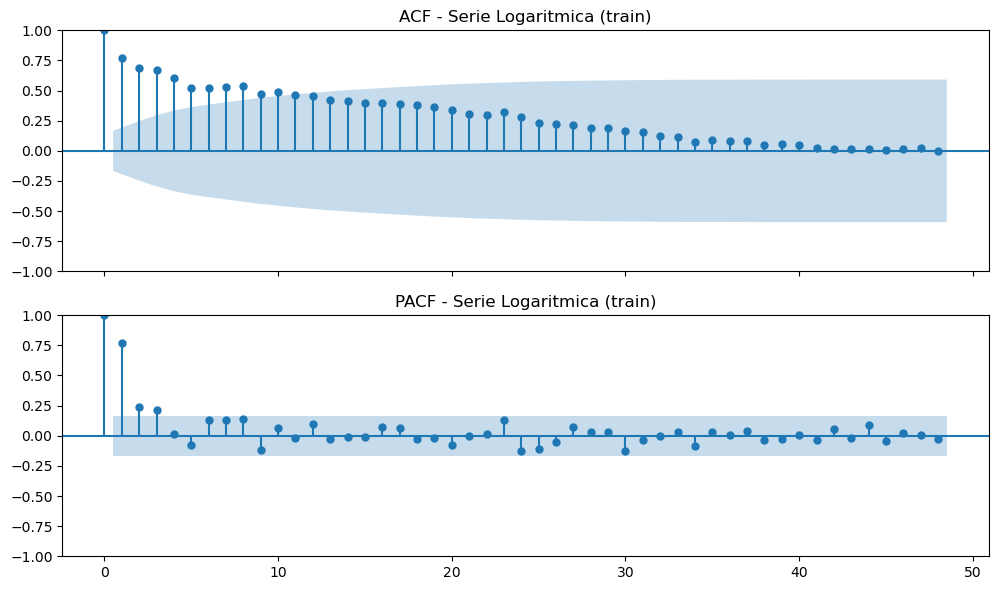

In [9]:
# -----------------------------
# 3) ACF / PACF (train)
# -----------------------------
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
plot_acf(train, lags=48, alpha=0.05, ax=ax[0])
ax[0].set_title("ACF - Serie Logaritmica (train)")
plot_pacf(train, lags=48, alpha=0.05, ax=ax[1], method="ywm")
ax[1].set_title("PACF - Serie Logaritmica (train)")
plt.tight_layout()
plt.show()

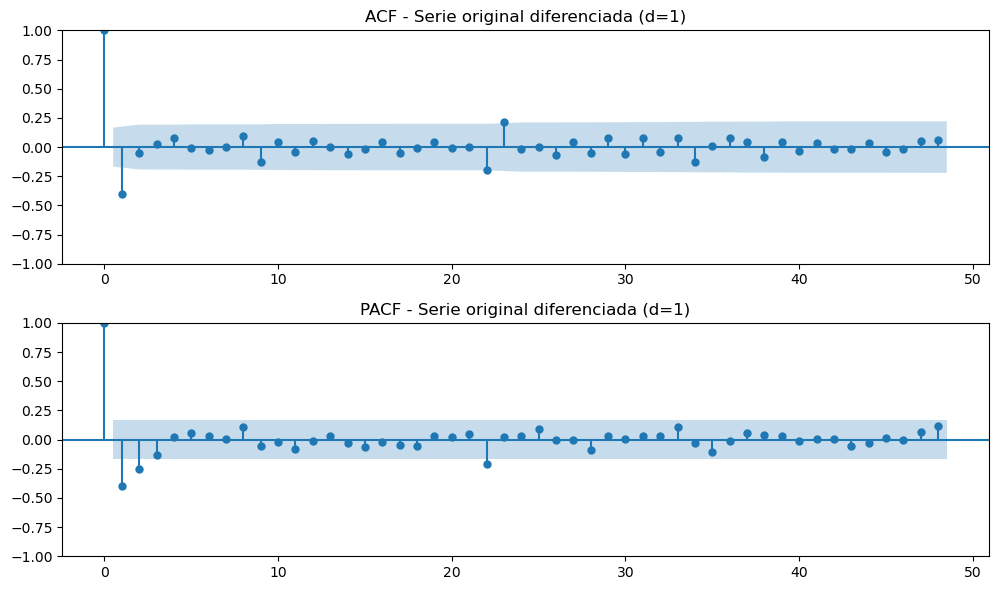

In [ ]:
# Diferenciación de primer orden
serie_diff = train.diff().dropna()

# Graficar
fig, ax = plt.subplots(2,1, figsize=(10,6))
plot_acf(serie_diff, lags=48, ax=ax[0])
ax[0].set_title("ACF - Serie Logaritmica diferenciada (d=1)")
plot_pacf(serie_diff, lags=48, ax=ax[1], method="ywm")
ax[1].set_title("PACF - Serie Logaritmica diferenciada (d=1)")
plt.tight_layout()
plt.show()

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Modelo 1

In [6]:
order = (0, 0, 1)
seasonal_order = (0, 0, 0, 12)

In [9]:
model = SARIMAX(
    train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
    freq='MS'
)

c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [10]:
res = model.fit(disp=False)

In [11]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  137
Model:               SARIMAX(0, 0, 1)   Log Likelihood                  63.296
Date:                dom, 22 feb 2026   AIC                           -122.591
Time:                        16:50:06   BIC                           -116.781
Sample:                    03-01-2007   HQIC                          -120.230
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4470      0.092      4.841      0.000       0.266       0.628
sigma2         0.0229      0.003      7.726      0.000       0.017       0.029
Ljung-Box (L1) (Q):                  66.80   Jarque-

### Modelo 2

In [12]:
order = (1, 0, 1)
seasonal_order = (0, 0, 0, 12)

In [13]:
model = SARIMAX(
    train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
    freq= 'MS'
)

c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [14]:
res = model.fit(disp=False)

In [15]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  137
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 149.812
Date:                dom, 22 feb 2026   AIC                           -293.623
Time:                        16:54:55   BIC                           -284.908
Sample:                    03-01-2007   HQIC                          -290.082
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9994      0.001    769.932      0.000       0.997       1.002
ma.L1         -1.0000    939.623     -0.001      0.999   -1842.628    1840.628
sigma2         0.0061      5.766      0.001      0.9

### Modelo 3

In [16]:
order = (0, 0, 2)
seasonal_order = (0, 0, 0, 12)

model = SARIMAX(
    train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [17]:

res = model.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  137
Model:               SARIMAX(0, 0, 2)   Log Likelihood                  83.712
Date:                dom, 22 feb 2026   AIC                           -161.425
Time:                        17:05:24   BIC                           -152.731
Sample:                    03-01-2007   HQIC                          -157.892
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4169      0.078      5.333      0.000       0.264       0.570
ma.L2          0.5106      0.088      5.828      0.000       0.339       0.682
sigma2         0.0167      0.002      8.825      0.0

### Modelo 4

In [18]:
order = (1, 0, 2)
seasonal_order = (0, 0, 0, 12)

model = SARIMAX(
    train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

res = model.fit(disp=False)
print(res.summary())

c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  137
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 175.104
Date:                dom, 22 feb 2026   AIC                           -342.207
Time:                        17:09:55   BIC                           -330.616
Sample:                    03-01-2007   HQIC                          -337.497
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   3032.824      0.000       0.999       1.001
ma.L1         -1.7492    471.867     -0.004      0.997    -926.592     923.094
ma.L2          0.7492    353.500      0.002      0.9

### Modelo 5

In [12]:
order = (0, 1, 1)
seasonal_order = (0, 0, 0, 12)

In [15]:
model = SARIMAX(
    train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
    freq= 'MS'
)

res = model.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  138
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 176.782
Date:                Sun, 22 Feb 2026   AIC                           -349.564
Time:                        17:29:09   BIC                           -343.754
Sample:                    02-01-2007   HQIC                          -347.203
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6040      0.043    -13.950      0.000      -0.689      -0.519
sigma2         0.0043      0.000     19.025      0.000       0.004       0.005
Ljung-Box (L1) (Q):                   0.02   Jarque-

c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
test = np.log(test)

In [19]:
forecast = res.get_forecast(steps=len(test))
pred = forecast.predicted_mean

mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))

print("ARIMA(0,1,1) - Dataset original")
print("MAE:", mae)
print("RMSE:", rmse)

ARIMA(0,1,1) - Dataset original
MAE: 0.018135888694183144
RMSE: 0.021384921792725442
